In [1]:
import scanpy as sc
import torch
from model import VAE
"""
# Load the data
adata_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/pancreas_test_2499/pancreas/K11/adata/adata_K11_dt_ve.h5ad"
pan = sc.read_h5ad(adata_path)
"""

'\n# Load the data\nadata_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/pancreas_test_2499/pancreas/K11/adata/adata_K11_dt_ve.h5ad"\npan = sc.read_h5ad(adata_path)\n'

In [27]:
gastrulation_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/lsvelo/isomap_1/pancreas/lsvelo_pancreas.h5ad"
adata = sc.read_h5ad(gastrulation_path)

In [2]:
gastrulation_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/imVelo/pancreas/imVelo_pancreas.h5ad"
adata = sc.read_h5ad(gastrulation_path)

In [25]:
gene_name = "Actb"

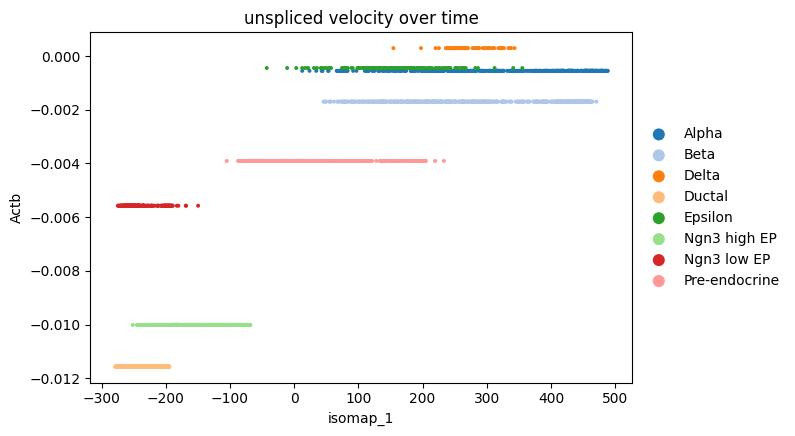

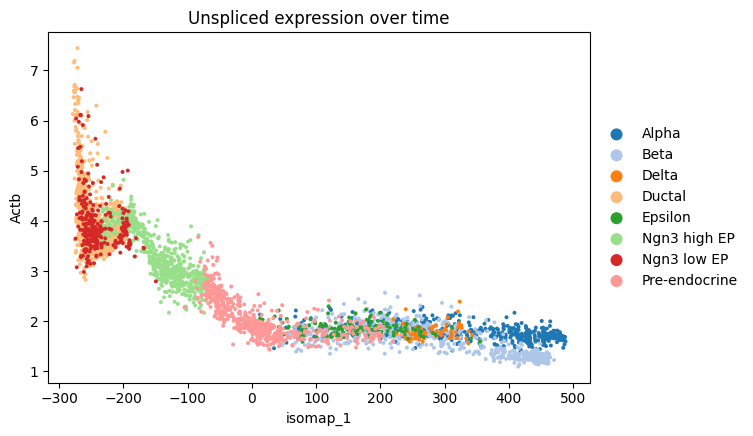

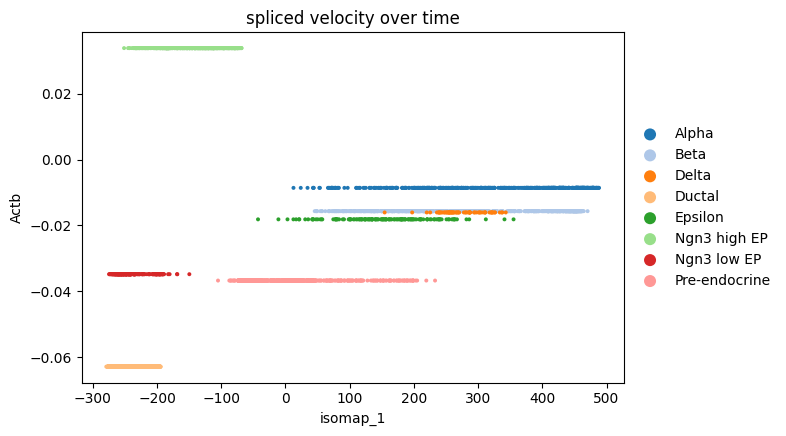

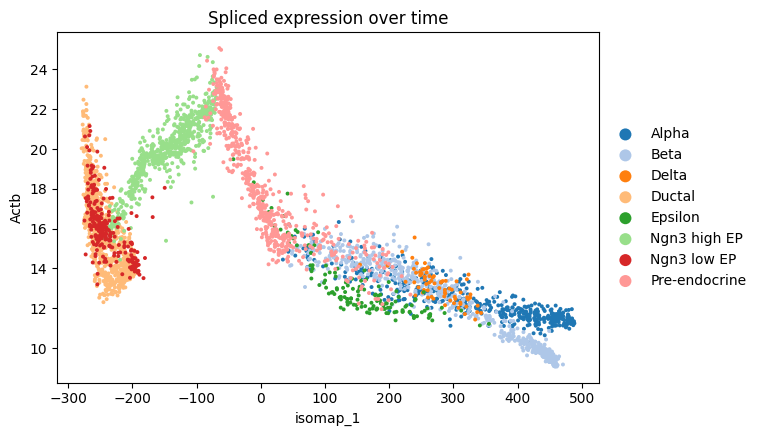

In [28]:
sc.pl.scatter(adata, x="isomap_1", y=f"{gene_name}", layers="velocity_u", color="clusters",
              title="unspliced velocity over time")

sc.pl.scatter(adata, x="isomap_1", y=f"{gene_name}", layers="Mu", color="clusters",
              title="Unspliced expression over time")

sc.pl.scatter(adata, x="isomap_1", y=f"{gene_name}", layers="velocity", color="clusters",
              title="spliced velocity over time")

sc.pl.scatter(adata, x="isomap_1", y=f"{gene_name}", layers="Ms", color="clusters",
              title="Spliced expression over time")

In [ ]:
numpy

/tmp/ipykernel_2693948/1212612187.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y_velocity_u, label="Unspliced velocity", c=colors, cmap='viridis', alpha=0.6)


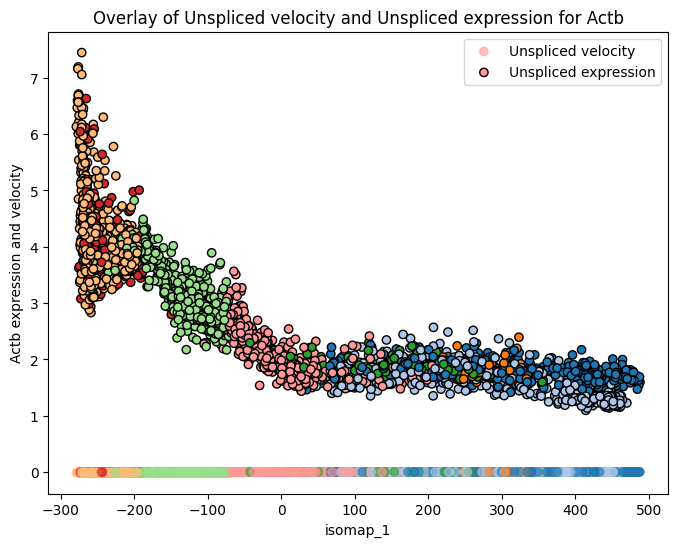

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Flag for whether to min-max normalize the y-axis
normalize_y = False  # Set to False if you don't want to normalize

# Retrieve the data
x = adata.obs["isomap_1"]
y_velocity_u = adata.layers["velocity_u"][:, adata.var_names == gene_name].flatten()
y_Mu = adata.layers["Mu"][:, adata.var_names == gene_name].flatten()

if normalize_y:
    # Min-max normalization for y_velocity_u
    y_velocity_u_min, y_velocity_u_max = y_velocity_u.min(), y_velocity_u.max()
    y_velocity_u = (y_velocity_u - y_velocity_u_min) / (y_velocity_u_max - y_velocity_u_min)

    # Min-max normalization for y_Mu
    y_Mu_min, y_Mu_max = y_Mu.min(), y_Mu.max()
    y_Mu = (y_Mu - y_Mu_min) / (y_Mu_max - y_Mu_min)

# Get the cluster labels and corresponding colors
clusters = adata.obs["clusters"]
cluster_colors = adata.uns["clusters_colors"]

# Map clusters to colors
cluster_color_map = {cluster: color for cluster, color in zip(clusters.cat.categories, cluster_colors)}
colors = clusters.map(cluster_color_map)

# Plot both curves
plt.figure(figsize=(8, 6))

# Scatter for unspliced velocity with cluster-based colors
plt.scatter(x, y_velocity_u, label="Unspliced velocity", c=colors, cmap='viridis', alpha=0.6)

# Scatter for unspliced expression with black edge color
plt.scatter(x, y_Mu, label="Unspliced expression", edgecolor='black', c=colors, facecolors='none')

# Add labels and legend
plt.title(f"Overlay of Unspliced velocity and Unspliced expression for {gene_name}")
plt.xlabel("isomap_1")

if normalize_y:
    plt.ylabel(f"Normalized {gene_name} expression and velocity")
else:
    plt.ylabel(f"{gene_name} expression and velocity")

plt.legend()
plt.show()


/tmp/ipykernel_2693948/1855209073.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y_velocity_u, label="Spliced velocity", c=colors, cmap='viridis', alpha=0.6)


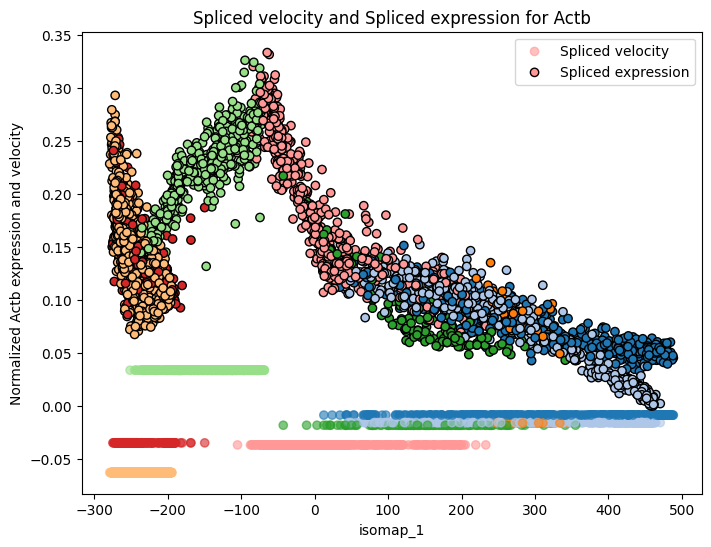

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Flag for whether to min-max normalize the y_Mu axis
normalize_y_Mu = True  # Set to False if you don't want to normalize y_Mu

# Retrieve the data
x = adata.obs["isomap_1"]
y_velocity_u = adata.layers["velocity"][:, adata.var_names == gene_name].flatten()
y_Mu = adata.layers["Ms"][:, adata.var_names == gene_name].flatten()

if normalize_y_Mu:
    # Min-max normalization for y_Mu
    y_Mu_min, y_Mu_max = y_Mu.min(), y_Mu.max()
    y_Mu = (y_Mu - y_Mu_min) / (y_Mu_max - y_Mu_min)
    y_Mu /=3

# Get the cluster labels and corresponding colors
clusters = adata.obs["clusters"]
cluster_colors = adata.uns["clusters_colors"]

# Map clusters to colors
cluster_color_map = {cluster: color for cluster, color in zip(clusters.cat.categories, cluster_colors)}
colors = clusters.map(cluster_color_map)

# Plot both curves
plt.figure(figsize=(8, 6))

# Scatter for spliced velocity with cluster-based colors
plt.scatter(x, y_velocity_u, label="Spliced velocity", c=colors, cmap='viridis', alpha=0.6)

# Scatter for spliced expression with black edge color
plt.scatter(x, y_Mu, label="Spliced expression", edgecolor='black', c=colors, facecolors='none')

# Add labels and legend
plt.title(f"Spliced velocity and Spliced expression for {gene_name}")
plt.xlabel("isomap_1")

# Update y-axis label based on normalization flag
if normalize_y_Mu:
    plt.ylabel(f"Normalized {gene_name} expression and velocity")
else:
    plt.ylabel(f"{gene_name} expression and velocity")

plt.legend()
plt.show()


In [ ]:
tot = 0
for key in ["nn", "pp", "pn", "np"]:
    tot += adata.layers[key]

tot = tot/4

adata.layers["total_discrepancy"] = tot

sc.pl.umap(adata, color="Tecr", layer="total_discrepancy")

In [ ]:
sc.pl.umap(adata, color="p_cell_uncertainty")

In [ ]:
import scanpy as sc
import torch
from model import VAE

# Load the data
adata_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/imVelo/forebrain/imVelo_forebrain.h5ad"
adata = sc.read_h5ad(adata_path)

# Initialize your model
model = VAE(adata)

# Load the checkpoint
model_path = "/mnt/data2/home/leonardo/git/multilineage_velocity/forebrain/model_epoch_20035.pt"
checkpoint = torch.load(model_path)

# Load the model state dictionary from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
model.eval()  # Recommended for inference/evaluation

from dataloaders import setup_dataloaders
_,_,dataloader = setup_dataloaders(adata, 256, train_size=1, split_data=False)

from metrics import compute_and_plot_velocity_coherence
compute_and_plot_velocity_coherence(adata, model, dataloader, 'forebrain', 'Clusters', save_figures=True)